<a href="https://colab.research.google.com/github/huxe/Machine-learning/blob/master/facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [3]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir("/content/drive/My Drive/facemask/test"): #Main Directory where each class label is present as folder name.
        if labels == 'without_mask': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'with_mask':
            label = 1

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
#             image=imageMorf(image)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'without_mask', 1:'with_mask'}
    return labels[class_code]

In [4]:
Images, Labels = get_images('/content/drive/My Drive/facemask/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (3844, 150, 150, 3)
Shape of Labels: (3844,)


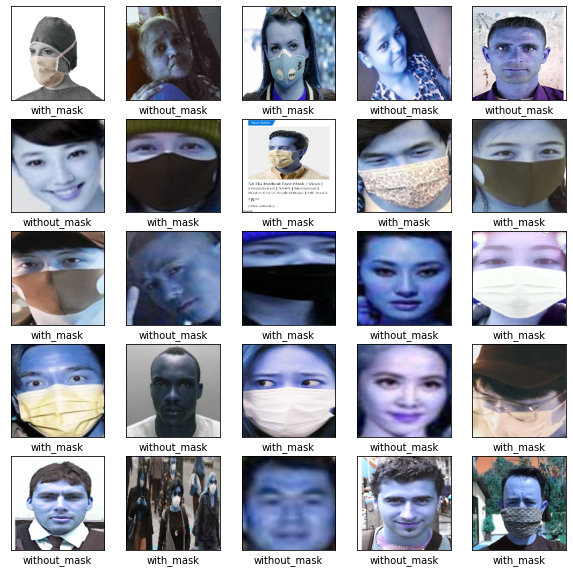

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i+100], cmap=plt.cm.binary)
    plt.xlabel(get_classlabel(Labels[i+100])) #(Labels[i])
plt.show()

In [29]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(2,activation='sigmoid'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 50)       

In [30]:
trained = model.fit(Images,Labels,epochs=100,validation_split=0.3)

Epoch 1/100
85/85 [==============================] - 12s 146ms/step - loss: 0.5617 - accuracy: 0.7394 - val_loss: 0.2649 - val_accuracy: 0.9107
Epoch 2/100
85/85 [==============================] - 12s 144ms/step - loss: 0.2967 - accuracy: 0.8941 - val_loss: 0.2126 - val_accuracy: 0.9298
Epoch 3/100
85/85 [==============================] - 12s 144ms/step - loss: 0.2293 - accuracy: 0.9186 - val_loss: 0.2738 - val_accuracy: 0.9116
Epoch 4/100
85/85 [==============================] - 12s 144ms/step - loss: 0.1981 - accuracy: 0.9283 - val_loss: 0.4877 - val_accuracy: 0.8232
Epoch 5/100
85/85 [==============================] - 12s 144ms/step - loss: 0.3838 - accuracy: 0.8454 - val_loss: 0.1839 - val_accuracy: 0.9333
Epoch 6/100
85/85 [==============================] - 12s 145ms/step - loss: 0.1892 - accuracy: 0.9335 - val_loss: 0.1856 - val_accuracy: 0.9411
Epoch 7/100
85/85 [==============================] - 12s 144ms/step - loss: 0.1650 - accuracy: 0.9420 - val_loss: 0.1686 - val_accuracy:

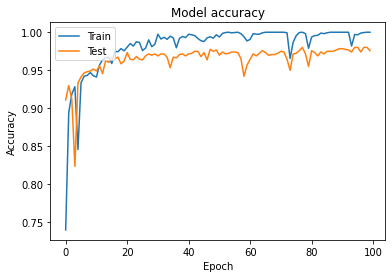

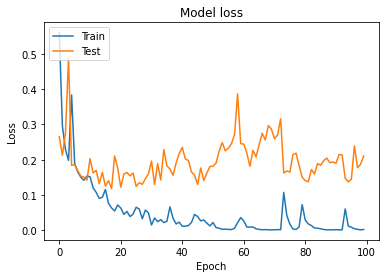

In [31]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [32]:
test_images,test_labels = get_images('/content/drive/My Drive/facemask/test/')

test_images = np.array(test_images)
# test_images = cv2.resize(test_images,(300,150))
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - accuracy: 1.0000


[1.1920928244535389e-07, 1.0]

In [33]:
predictions=model.predict_classes (test_images)

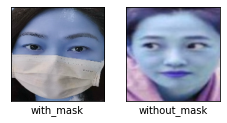

In [34]:
plt.figure(figsize=(10,10))
for i in range(test_images.shape[0]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(get_classlabel(predictions[i]))
plt.show()